In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
# from keras.applications.vgg16 import VGG16
from tensorflow.python.client import device_lib

# from keras.utils import plot_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Dense, Flatten, LSTM, Activation, BatchNormalization
from tensorflow.keras.layers import Dropout, RepeatVector, TimeDistributed
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
X = np.load('/content/drive/My Drive/Deep Steel/X_data.npy')
y = np.load('/content/drive/My Drive/Deep Steel/Y_data.npy')
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

y = indices_to_one_hot(y.astype(int), 5)
X = X/255
print(X.shape)
print(y.shape)

(1857, 224, 224)
(1857, 5)


[1. 0. 0. 0. 0.]


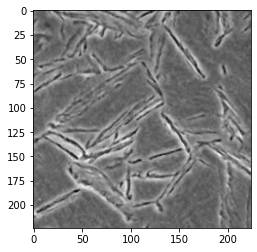

In [4]:
print(y[1])
plt.imshow(X[1], 'gray')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1615, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = tf.keras.preprocessing.image.NumpyArrayIterator(X_train.reshape(-1,224,224,1), y_train.reshape(-1,5), 
                                                                 train_datagen,batch_size=32, shuffle=True)

test_generator = tf.keras.preprocessing.image.NumpyArrayIterator(X_test.reshape(-1,224,224,1), y_test.reshape(-1,5), test_datagen,
                                                              batch_size=32, shuffle=True)

(1557, 224, 224)
(1557, 5)
(300, 224, 224)
(300, 5)


In [0]:
network = tf.keras.applications.InceptionResNetV2(include_top=True, weights=None, input_shape=(224,224,1), classes=5)
# model = Sequential()
# model.add(network)
# model.add(G())
# model.add(Dense(512))
# model.add(Dense(512))
# model.add(Dense(5))

#network.summary()

In [0]:
network.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

In [0]:
#filepath = "/content/drive/My Drive/Deep Steel/resnet50_SrLr_best.hdf5"
# filepath = "/content/drive/My Drive/Deep Steel/InceptionResNetV2/InceptionResNetV2_SLr_best.hdf5"

# checkpoint = ModelCheckpoint(filepath,
#                             monitor='val_acc',
#                             verbose=1,
#                             save_best_only=True,
#                             mode='max')

#history = network.fit_generator(train_generator, epochs=1, validation_data=test_generator, callbacks=[checkpoint]) 

In [21]:
history2 = network.fit_generator(train_generator, epochs=100, validation_data=test_generator)#, callbacks=[checkpoint]) 

Epoch 1/100
49/49 [==============================] - 139s 3s/step - loss: 1.0354 - acc: 0.5947 - val_loss: 1.6727 - val_acc: 0.2667
Epoch 2/100
49/49 [==============================] - 78s 2s/step - loss: 0.6955 - acc: 0.7675 - val_loss: 1.9395 - val_acc: 0.2667
Epoch 3/100
49/49 [==============================] - 78s 2s/step - loss: 0.5893 - acc: 0.8009 - val_loss: 2.2209 - val_acc: 0.2667
Epoch 4/100
49/49 [==============================] - 78s 2s/step - loss: 0.5296 - acc: 0.8150 - val_loss: 2.5115 - val_acc: 0.2667
Epoch 5/100
49/49 [==============================] - 79s 2s/step - loss: 0.4679 - acc: 0.8401 - val_loss: 2.7542 - val_acc: 0.2667
Epoch 6/100
49/49 [==============================] - 78s 2s/step - loss: 0.4399 - acc: 0.8452 - val_loss: 2.9122 - val_acc: 0.2567
Epoch 7/100
49/49 [==============================] - 78s 2s/step - loss: 0.4423 - acc: 0.8388 - val_loss: 3.2701 - val_acc: 0.2633
Epoch 8/100
49/49 [==============================] - 78s 2s/step - loss: 0.4092 - 

In [25]:
network.save('/content/drive/My Drive/Deep Steel/InceptionResNetV2/IR_Slr_final.h5')

KeyboardInterrupt: ignored

In [0]:
train_loss = history2.history['loss']
train_acc = history2.history['acc']
val_loss = history2.history['val_loss']
val_acc = history2.history['val_acc']
np.save('/content/drive/My Drive/Deep Steel/InceptionResNetV2/IR_tloss0-100.npy',np.array(train_loss))
np.save('/content/drive/My Drive/Deep Steel/InceptionResNetV2/IR_tacc0-100.npy', np.array(train_acc))
np.save('/content/drive/My Drive/Deep Steel/InceptionResNetV2/IR_loss0-100.npy',np.array(val_loss))
np.save('/content/drive/My Drive/Deep Steel/InceptionResNetV2/IR_acc0-100.npy', np.array(val_acc))